# 正確な解決策

### ベイズ推論について
事後分布 = (事前分布 * 尤度) / 正規化項

<img src="../images/4.png" >

正規化項の計算。
事前分布と尤度がわかれば解析的に解くことができる。

<img src="../images/5.png" >

### 能動的推論での前提
- 事前分布: p(v)
  - プライアとも呼ばれ、感覚データを見る前の、世界の隠れ状態について生物が持つ知識を意味する 
- 尤度: p(u|v)
  - 隠れ状態からどのように観察データが静止されるかについての生物が持つ知識を意味する
- p(u):
  - 観察データ:u が環境で生じる確率。能動的推論では計算不可能であるため、p(u)に依存しない近似値を用いる

# 演習1
光の強度u = 2を観測したとし、その受容体のノイズレベルがΣu = 1、サイズの事前期待の平均と分散がvp = 3およびΣp = 1であると仮定します。サイズの事後確率を0.01から5まで計算し、それらをプロットするコンピュータプログラムを書きます。

In [74]:
# 動物の持つサイズに対する事前の知識(プライア)
# v: サイズを0.01から5まで0.01刻みで用意する
vs = np.arange(0, 5.1, 0.1)
print(vs)

# p(v)の確率密度を求める
p_v = norm.pdf(vs, loc=3, scale=1)
print(p_v)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5. ]
[0.00443185 0.00595253 0.00791545 0.01042093 0.01358297 0.0175283
 0.02239453 0.02832704 0.03547459 0.0439836  0.05399097 0.06561581
 0.07895016 0.09404908 0.11092083 0.1295176  0.14972747 0.17136859
 0.19418605 0.21785218 0.24197072 0.26608525 0.28969155 0.31225393
 0.3332246  0.35206533 0.36827014 0.38138782 0.39104269 0.39695255
 0.39894228 0.39695255 0.39104269 0.38138782 0.36827014 0.35206533
 0.3332246  0.31225393 0.28969155 0.26608525 0.24197072 0.21785218
 0.19418605 0.17136859 0.14972747 0.1295176  0.11092083 0.09404908
 0.07895016 0.06561581 0.05399097]


In [75]:
# 光の強度は平均がg(v)で分散がΣu=1の正規分布であり、これが２となる確率を求める
# g(v) = g(v) = v^2
import numpy as np
from scipy.stats import norm

p_uv = norm.pdf(2, loc=vs**2, scale=1)
print(p_u)

[9.77249868e-001 9.76704532e-001 9.75002105e-001 9.71933393e-001
 9.67115881e-001 9.59940843e-001 9.49497417e-001 9.34478288e-001
 9.13085038e-001 8.82976804e-001 8.41344746e-001 7.85236116e-001
 7.12260281e-001 6.21719522e-001 5.15953437e-001 4.01293674e-001
 2.87739719e-001 1.86732943e-001 1.07487697e-001 5.36989281e-002
 2.27501319e-002 7.97626026e-003 2.25567669e-003 5.00936914e-004
 8.49566785e-005 1.06885258e-005 9.67964796e-007 6.11581800e-008
 2.61004111e-009 7.27598182e-011 1.27981254e-012 1.37047961e-014
 8.61053278e-017 3.05544546e-019 5.88783523e-022 5.91717691e-025
 2.97496844e-028 7.16933069e-032 7.92519599e-036 3.84122148e-040
 7.79353682e-045 6.31201594e-050 1.94364031e-055 2.16474737e-061
 8.28617101e-068 1.03454637e-074 3.99366204e-082 4.51310402e-090
 1.41188946e-098 1.15496014e-107 2.33063701e-117]


In [86]:
# p(v|u) = (p(v) * p(u|v)) / p(u) の分子部分
numerator = p_v * p_uv

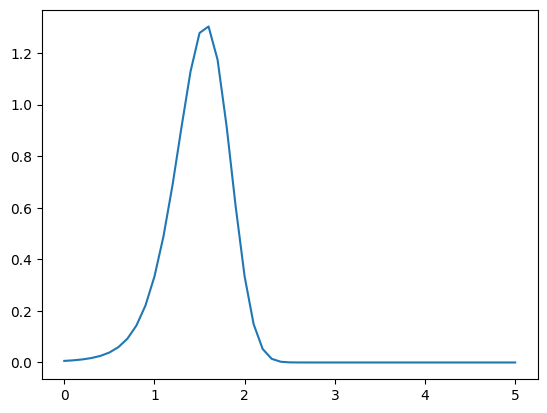

In [87]:
import matplotlib.pyplot as plt

# 事後分布p(v|u)を正規化する(足して1になるようにするということ)
normalization = sum (numerator * 0.1)
p_vu = p_vu / normalization

plt.plot(vs, p)

# 考察
観察データから、事後分布: p(v|u)を取得することができた。  
生物は観察データによって更新された分布を利用して、外部世界とより調和した分布を得ることができたわけで、  
生存確率をより高めることができるようになるだろう。しかし、残念ながら、実際の生物はこの計算を実行することはできない。

> まず、推論したい変数と観測を関連付ける関数gが非線形である場合、事後分布p(v∣u)は標準的な形を取らない可能性があります。例えば図1の分布は正規ではありません。したがって、分布p(v∣u)を表現するには、平均や分散といったいくつかの要約統計量ではなく、異なる可能なuに対する無限に多くの値p(v∣u)を表現する必要があります。二つ目に、事後分布の計算には正規化項の計算が含まれます。離散確率分布の場合に基底核内の回路が正規化項を計算できると提案されています（Bogacz & Gurney, 2007）、連続分布の正規化の計算には式(5)の積分を評価することが含まれます。このような積分を計算することは、単純な生物システムにとって挑戦的です。これは、積分の次元数（つまり、未知の変数の数）が些細な数を超える場合に特に当てはまります。数学者でさえ、この場合には（計算コストが非常に高い）数値的またはサンプリング技術に頼ることがあります。